In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the customer data
df = pd.read_csv('C:\\Users\\yedid\\Downloads\\archive\\Mall_Customers.csv')


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [8]:
Data = df["Gender"].value_counts()
Data

Female    112
Male       88
Name: Gender, dtype: int64

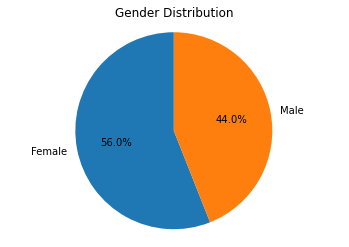

In [9]:
# Create pie chart
plt.pie(Data,labels = ["Female","Male"], autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Gender Distribution')

# Display the plot
plt.show()


In [10]:
cols = ["Age","Annual Income (k$)","Spending Score (1-100)"]

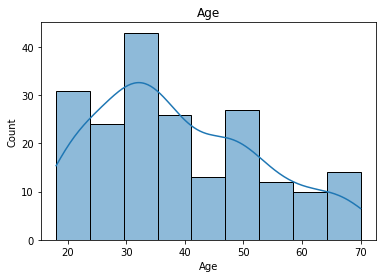

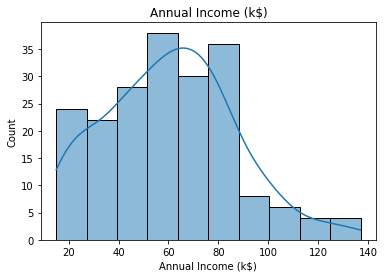

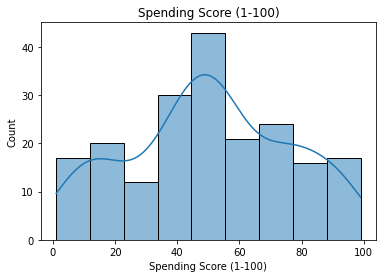

In [11]:
for col in cols:
    plt.figure()
    plt.title(col)
    sns.histplot(data=df, x=col, kde=True)
    plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [13]:
df["Gender"] = label_encoder(df["Gender"])

Gender ['Female' 'Male']


In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [15]:
df.drop("CustomerID", axis=1, inplace = True)

In [16]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=5)
clusters = agglo.fit_predict(df)

In [17]:
df['cluster'] = pd.DataFrame(clusters)

In [18]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


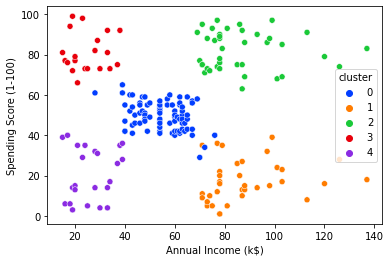

In [19]:
plt.figure()
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue=df["cluster"], palette=sns.color_palette('bright', 5))
plt.show()
